In [3]:
from thesis import SAVED_RESULTS_PATH
import os
import matplotlib.pyplot as plt
import numpy as np
from typing import Optional
import scanpy as sc


FIGURES_PATH = SAVED_RESULTS_PATH / "figures"
os.makedirs(FIGURES_PATH, exist_ok=True)

In [4]:
from thesis.datasets import SplitDatasetPipeline


def get_umap_counts(pipeline: SplitDatasetPipeline, filename: Optional[str] = None, target_cell_type: str = "Hepatocytes - portal", condition: str = 'Dose'):
    dataset = pipeline.dataset
    dataset.obs["split"] = "~train"
    dataset.obs["splittest"] = "~test"
    
    cell_type_key = pipeline.cell_type_key

    train_adata, validation_adata = pipeline.split_dataset_to_train_validation(target_cell_type=target_cell_type)
    test_adata_input = pipeline.get_ctrl_test(
        target_cell_type=target_cell_type
    )
    test_adata_evaluation = pipeline.get_stim_test(
        target_cell_type=target_cell_type
    )
    
    if condition == 'Dose':
        dataset.obs['Dose'] = dataset.obs['Dose'].astype('category')

    dataset.obs.loc[train_adata.obs_names, "split"] = "train"
    dataset.obs.loc[test_adata_input.obs_names, "splittest"] = "input"
    dataset.obs.loc[test_adata_evaluation.obs_names, "splittest"] = "evaluation"

    fig, axs = plt.subplots(2, 2, figsize=(16, 12))

    sc.pl.umap(dataset, color=cell_type_key, show=False, ax=axs[0, 0])
    axs[0, 0].set_title("Cell Type")

    sc.pl.umap(dataset, color=condition, show=False, ax=axs[0, 1])
    axs[0, 1].set_title(condition)

    sc.pl.umap(
        dataset,
        color="split",
        palette={
            "~train": plt.cm.Reds(0.8),
            "train": plt.cm.Blues(0.5)},
        show=False,
        ax=axs[1, 0],
    )
    axs[1, 0].set_title("Train")

    sc.pl.umap(
        dataset,
        color="splittest",
        palette={
            "~test": plt.cm.Reds(0.8),
            "input": plt.cm.Blues(0.5),
            "evaluation": plt.cm.Greens(0.4),
        },
        show=False,
        ax=axs[1, 1],
    )
    axs[1, 1].set_title("Test")

    plt.tight_layout()
    if filename is not None:
        fig.savefig(FIGURES_PATH / f"{filename}.png", dpi=300, bbox_inches="tight")
    plt.show()

Preprocessing started
Preprocessing finished


/g/kreshuk/katzalis/repos/thesis/thesis/datasets.py:463: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control.obs["condition"] = "control"
/g/kreshuk/katzalis/repos/thesis/thesis/datasets.py:464: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  perturb.obs["condition"] = "stimulated"


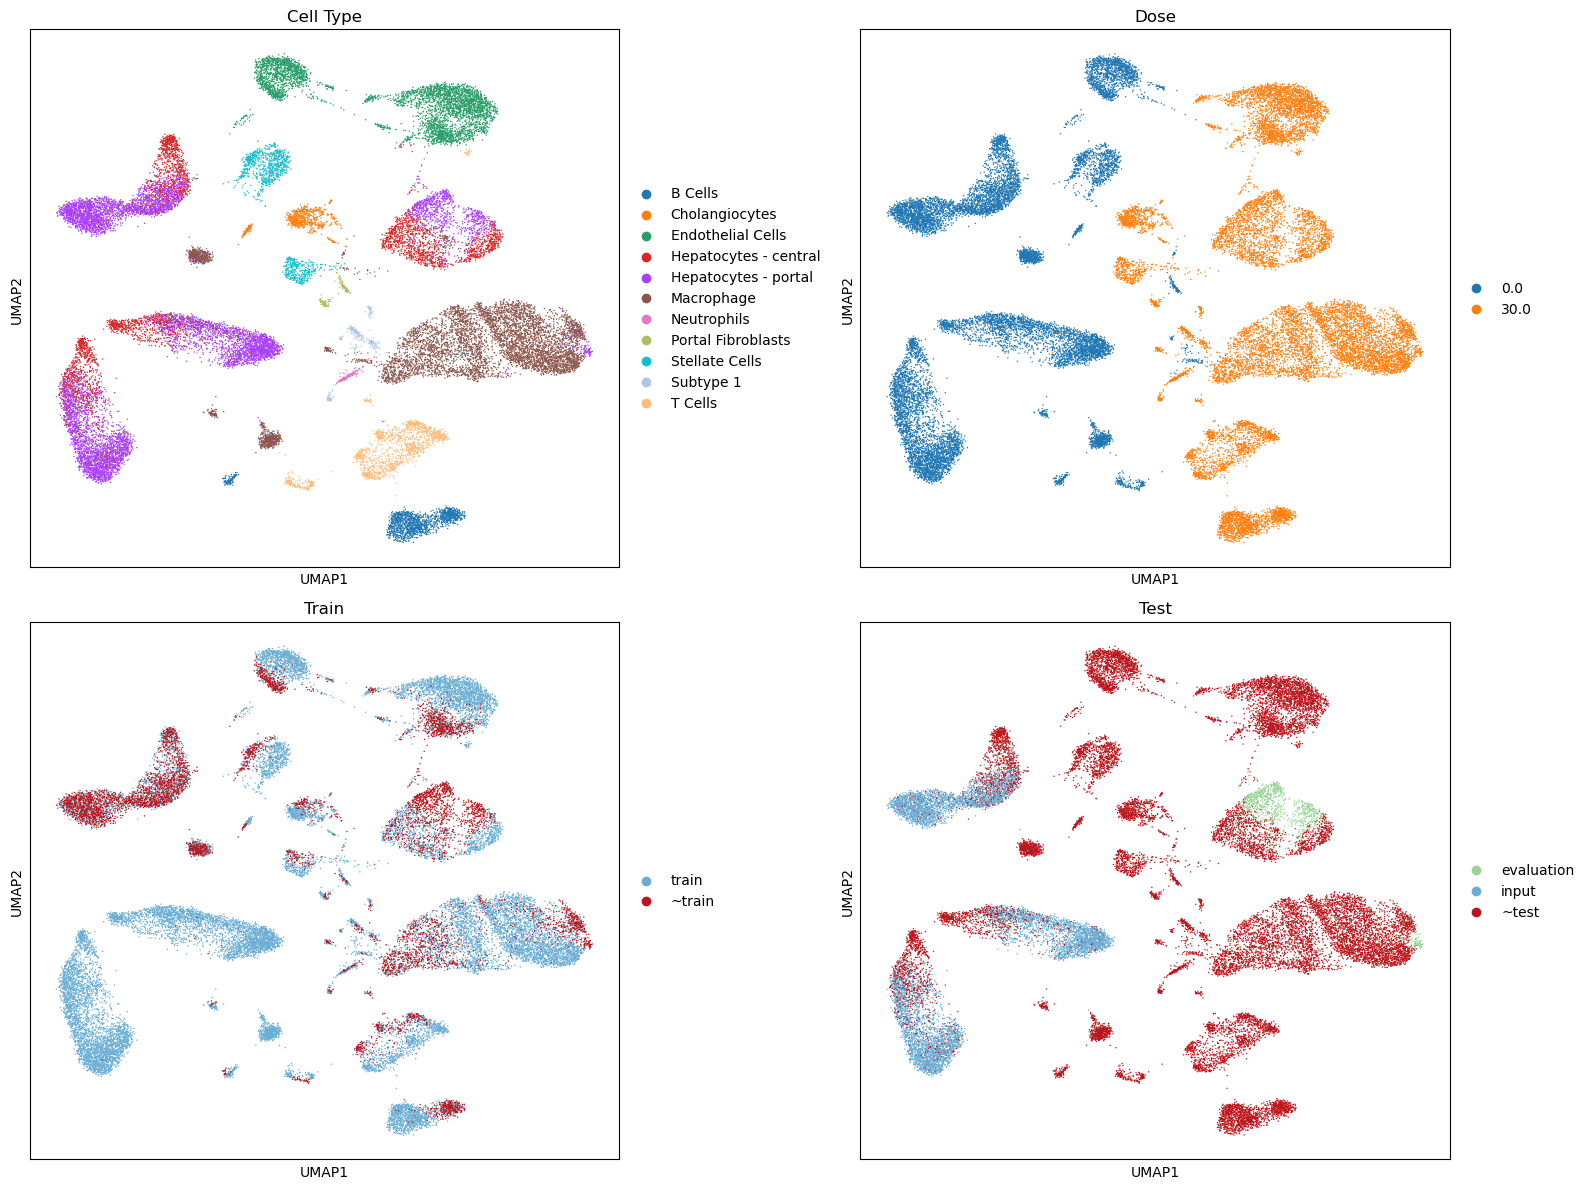

In [5]:
from thesis.datasets import NaultPipeline, NaultSinglePipeline

nault_single = NaultSinglePipeline(
    dataset_pipeline=NaultPipeline(), dosages=30
)
dataset = nault_single.dataset

sc.pp.pca(dataset)
sc.pp.neighbors(dataset)
sc.tl.umap(dataset)

get_umap_counts(nault_single, 'nault_umap_split_30')

In [6]:
from thesis.datasets import NaultPipeline, NaultMultiplePipeline

nault_multiple = NaultMultiplePipeline(
    dataset_pipeline=NaultPipeline()
)
dataset = nault_multiple.dataset

sc.pp.pca(dataset)
sc.pp.neighbors(dataset)
sc.tl.umap(dataset)


Preprocessing started
Preprocessing finished


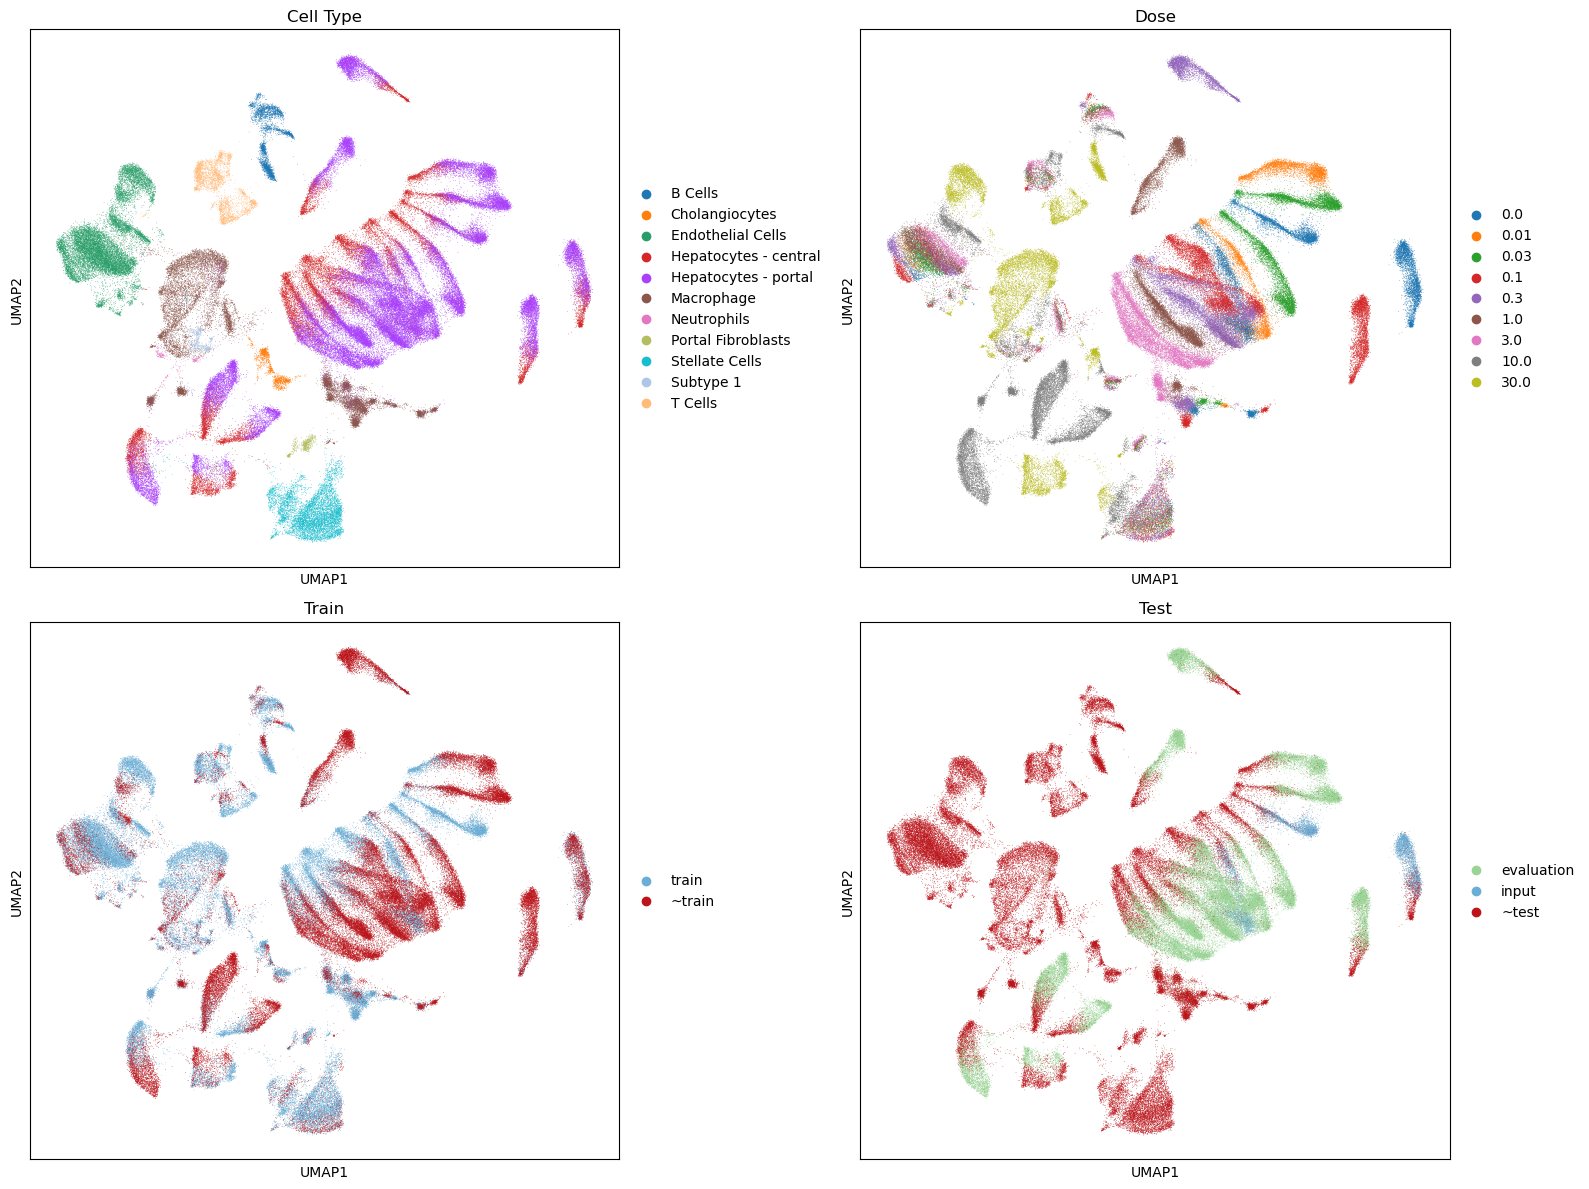

In [7]:
get_umap_counts(nault_multiple, 'nault_umap_split_multiple')

In [8]:
from thesis.datasets import NaultLiverTissuePipeline, NaultSinglePipeline

nault_single = NaultSinglePipeline(
    dataset_pipeline=NaultLiverTissuePipeline(), dosages=30
)
dataset = nault_single.dataset

sc.pp.pca(dataset)
sc.pp.neighbors(dataset)
sc.tl.umap(dataset)



Preprocessing started
Preprocessing finished


/g/kreshuk/katzalis/repos/thesis/thesis/datasets.py:463: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control.obs["condition"] = "control"
/g/kreshuk/katzalis/repos/thesis/thesis/datasets.py:464: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  perturb.obs["condition"] = "stimulated"


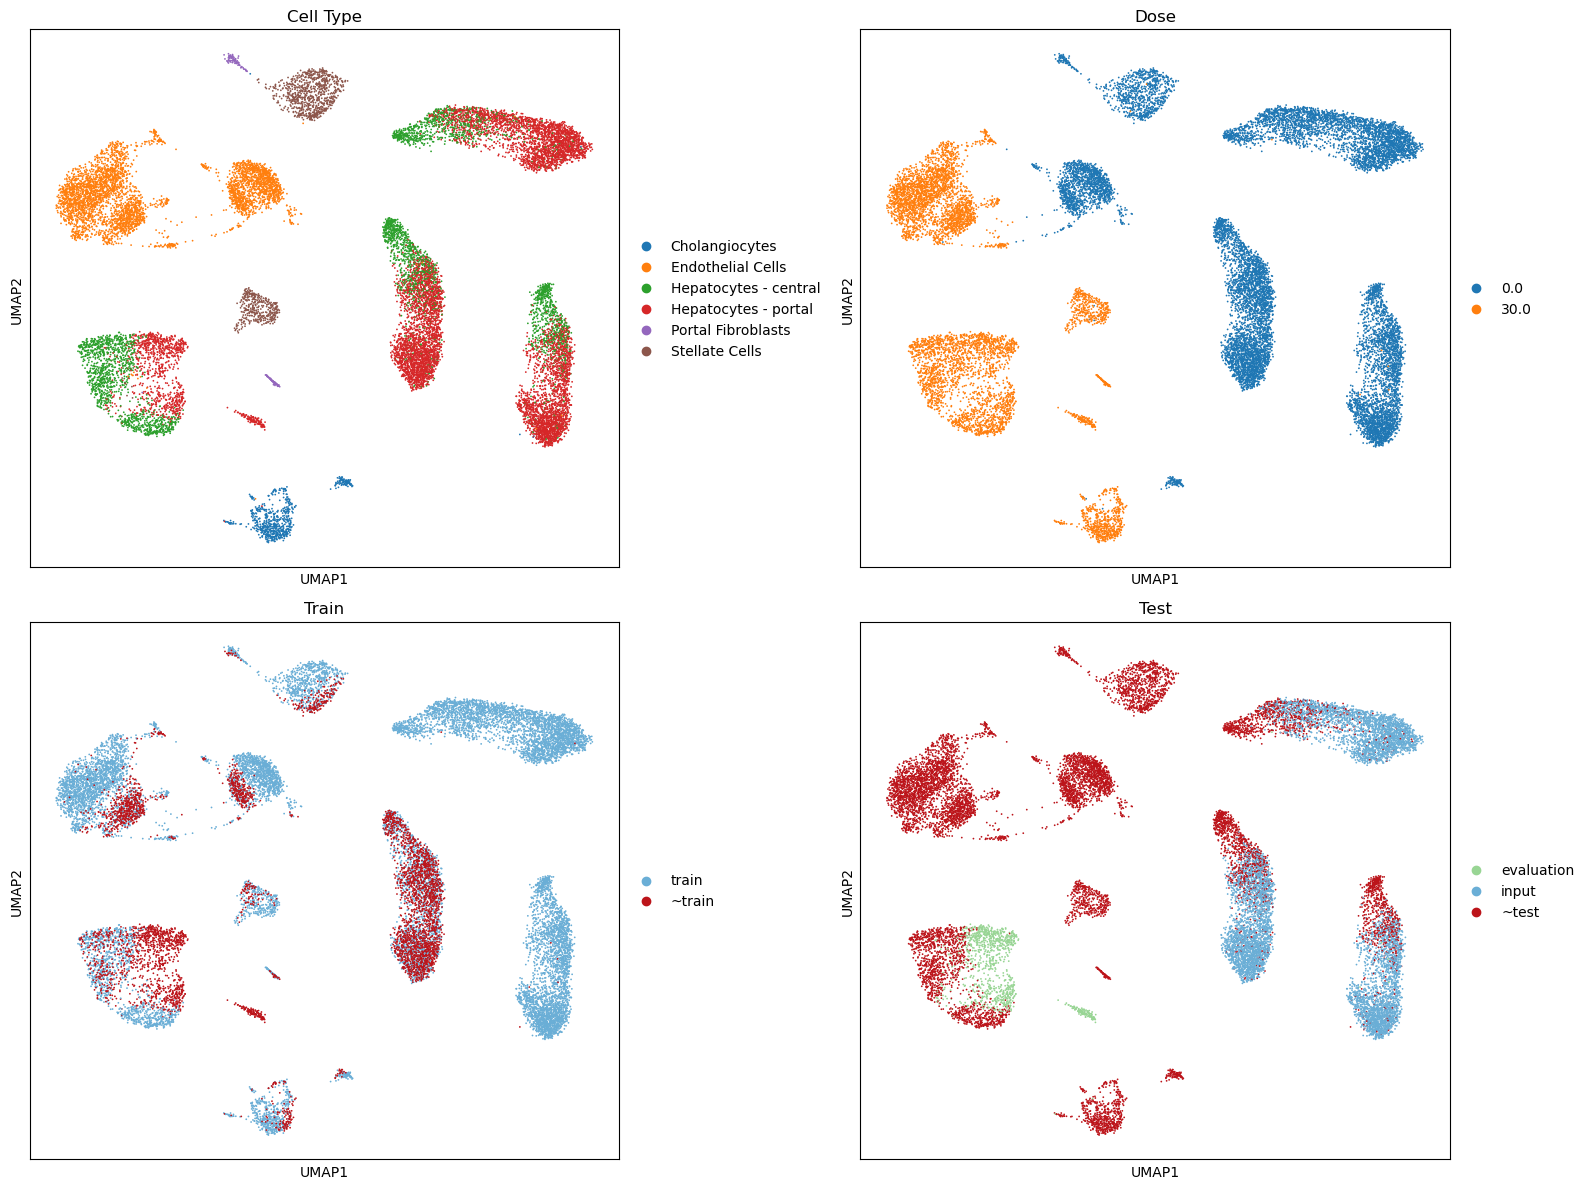

In [9]:
get_umap_counts(nault_single, 'nault_liver_umap_split_30')

In [10]:
from thesis.datasets import NaultLiverTissuePipeline, NaultMultiplePipeline

nault_multiple = NaultMultiplePipeline(
    dataset_pipeline=NaultLiverTissuePipeline()
)
dataset = nault_multiple.dataset

sc.pp.pca(dataset)
sc.pp.neighbors(dataset)
sc.tl.umap(dataset)



Preprocessing started
Preprocessing finished


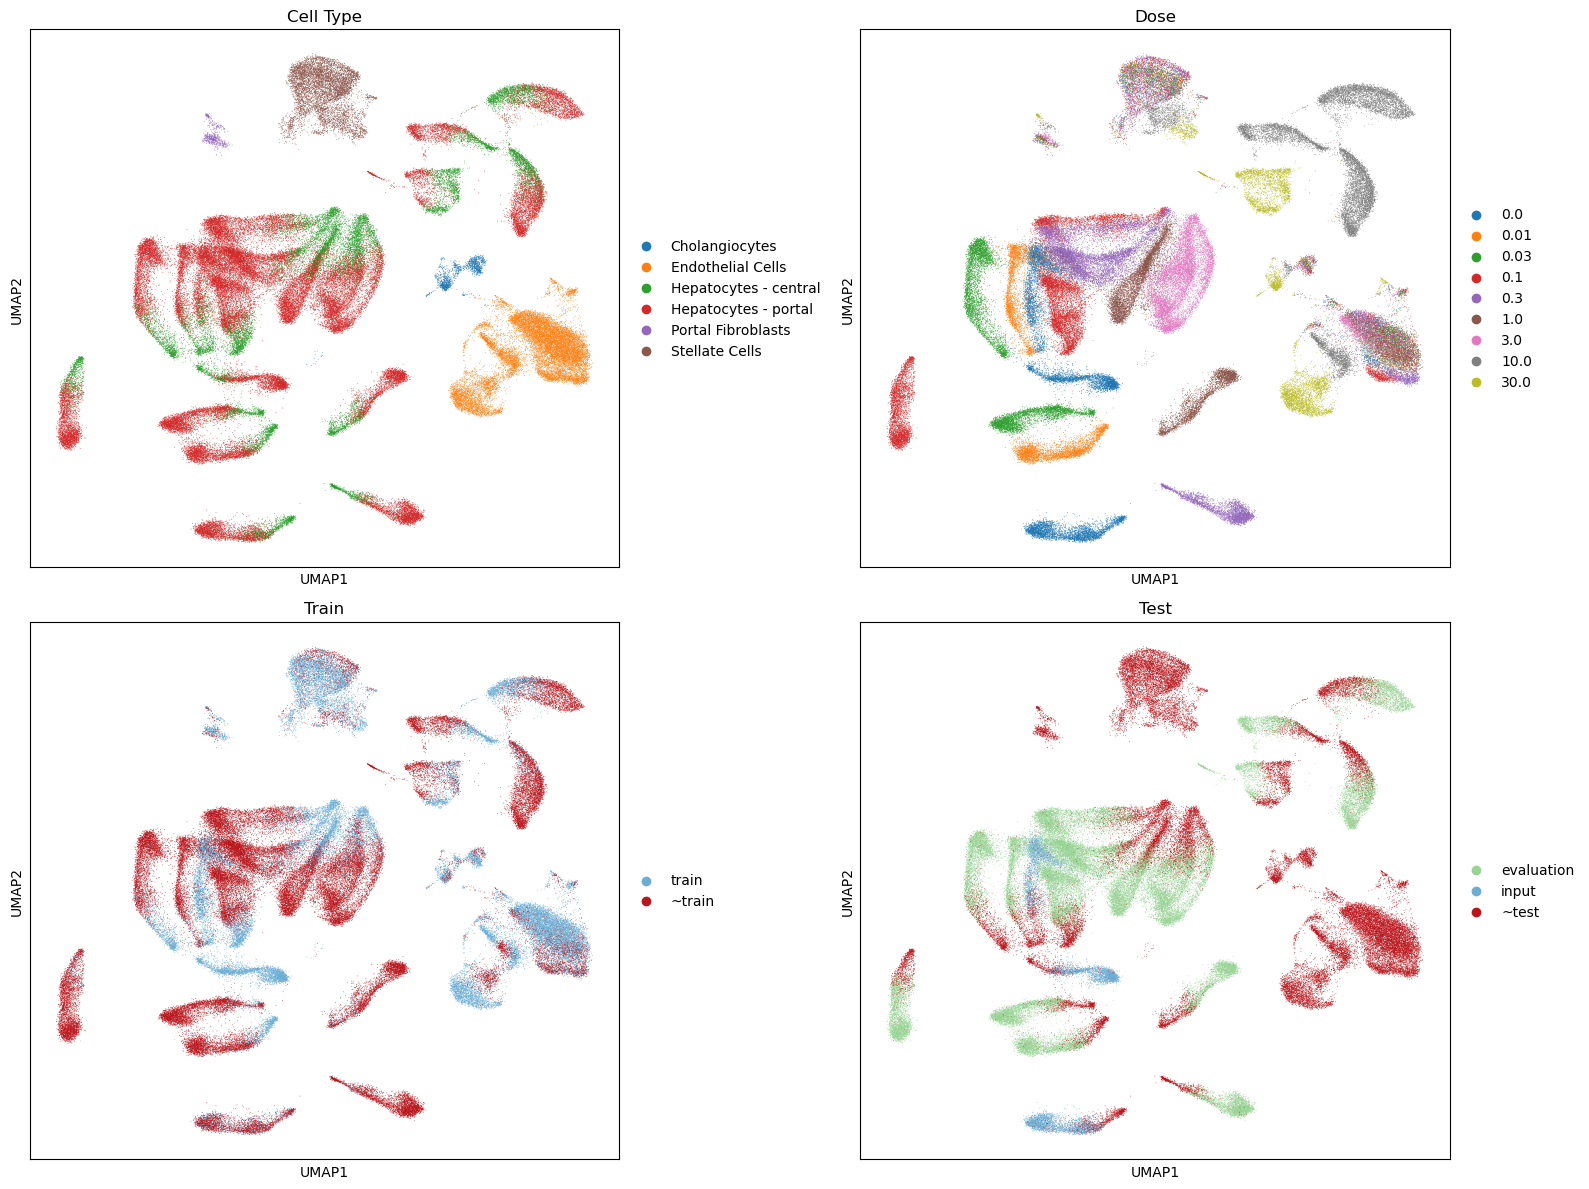

In [11]:
get_umap_counts(nault_multiple, 'nault_liver_umap_split_multiple')

In [12]:
from thesis.datasets import PbmcPipeline, PbmcSinglePipeline

pbmc = PbmcSinglePipeline(
    dataset_pipeline=PbmcPipeline()
)
dataset = pbmc.dataset

sc.pp.pca(dataset)
sc.pp.neighbors(dataset)
sc.tl.umap(dataset)

/g/kreshuk/katzalis/repos/thesis/thesis/datasets.py:590: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control.obs[dose_key] = 0.0
/g/kreshuk/katzalis/repos/thesis/thesis/datasets.py:591: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  perturb.obs[dose_key] = -1.0


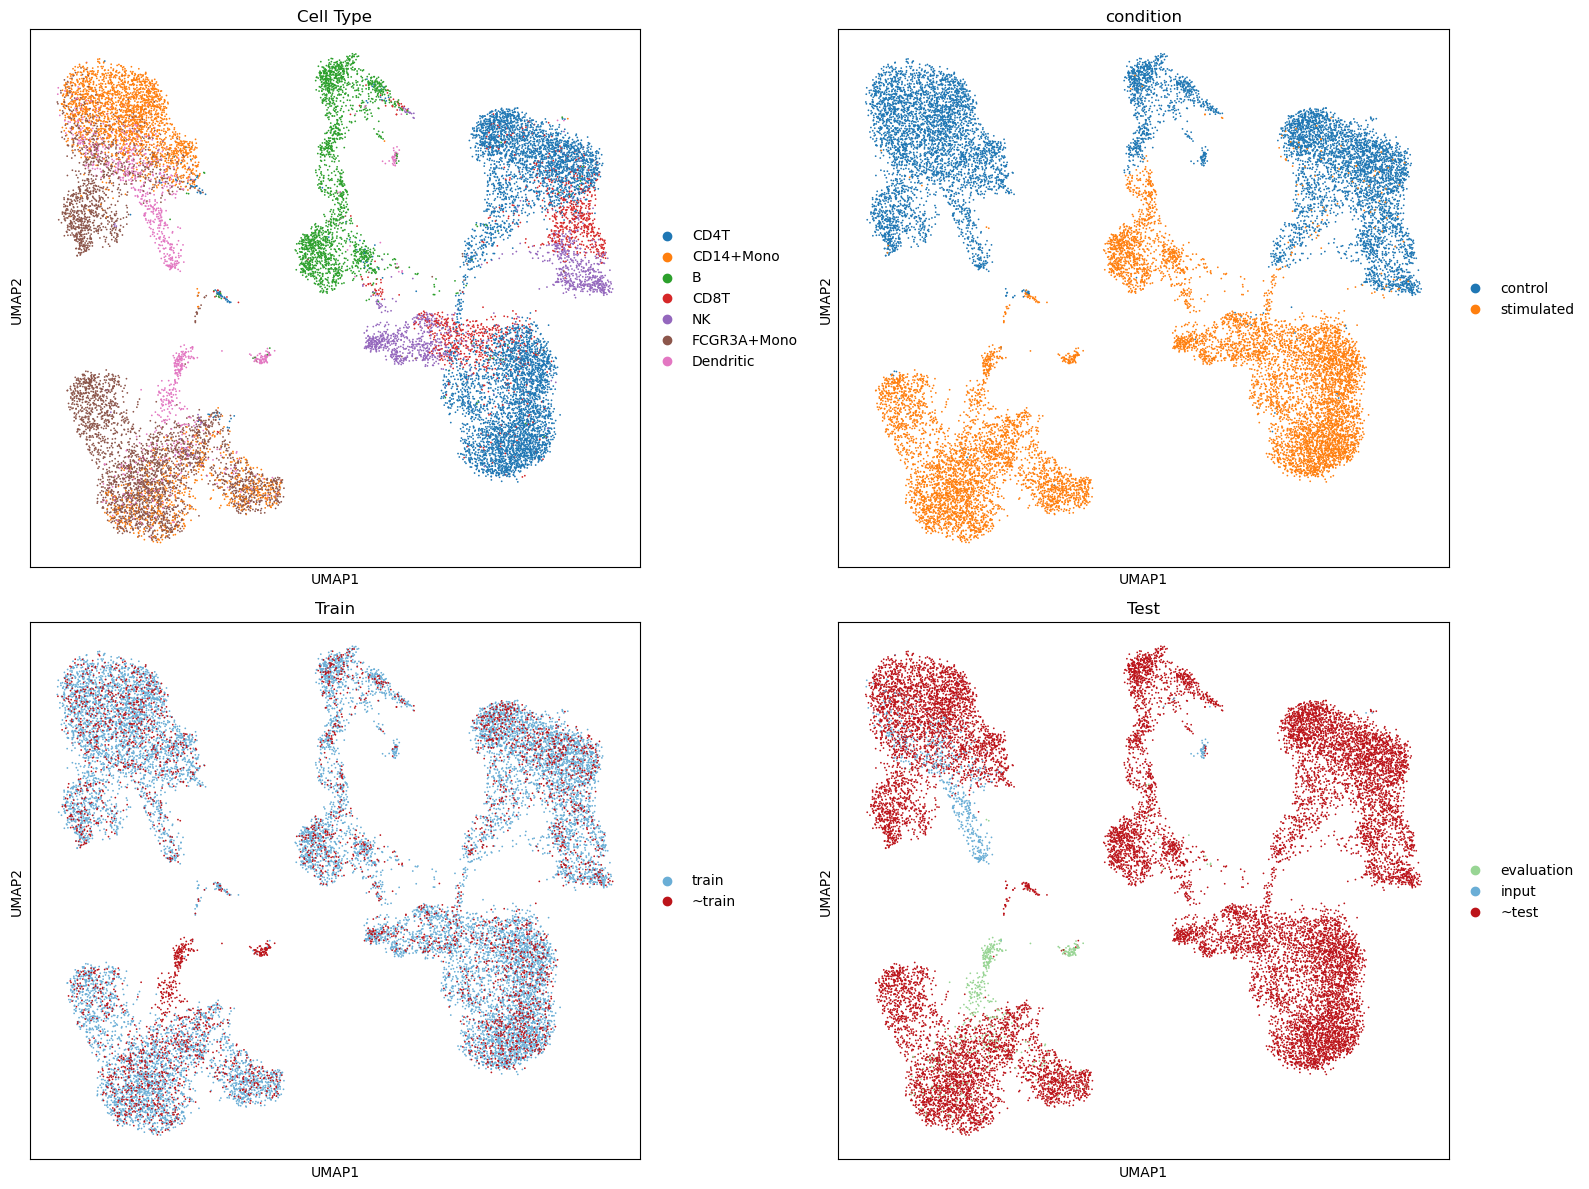

In [13]:
get_umap_counts(pbmc, 'pbmc_split', target_cell_type='Dendritic', condition='condition')

In [14]:
import matplotlib.pyplot as plt



def get_split_counts(pipeline, filename: Optional[str] = None, with_percentage: bool = False, ax=None):
    # Use the provided axis if available, otherwise create a new one (e.g., for standalone plotting)
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 10))

    dataset = pipeline.dataset
    width = 0.2
    cell_types = dataset.obs[pipeline.cell_type_key].unique().tolist()
    x = np.arange(len(cell_types))
    
    total_count = len(dataset)

    train_size_cell_types = []
    ctrl_test_size_cell_types = []
    stim_test_size_cell_types = []
    
    for cell_type in cell_types:
        train, validation = pipeline.split_dataset_to_train_validation(target_cell_type=cell_type)        
        ctrl_test = pipeline.get_ctrl_test(target_cell_type=cell_type)
        stim_test = pipeline.get_stim_test(target_cell_type=cell_type)
        
        train_count = len(train)
        ctrl_count = len(ctrl_test)
        stim_count = len(stim_test)
        
        print(f'{cell_type}: train={train_count}, ctrl test={ctrl_count}, stim test={stim_count}')
        
        if with_percentage:
            train_count = train_count / total_count * 100
            ctrl_count = ctrl_count / total_count * 100
            stim_count = stim_count / total_count * 100
            print(f'{cell_type} with percentage: train={train_count}, ctrl test={ctrl_count}, stim test={stim_count}')
        
        train_size_cell_types.append(train_count)
        ctrl_test_size_cell_types.append(ctrl_count)
        stim_test_size_cell_types.append(stim_count)
        
    # Plotting on the specified axis
    ax.bar(x - width, train_size_cell_types, width, label='train', color=plt.cm.Purples(0.3))
    ax.bar(x, ctrl_test_size_cell_types, width, label='test input', color=plt.cm.Reds(0.3))
    ax.bar(x + width, stim_test_size_cell_types, width, label='test evaluation', color=plt.cm.Greens(0.3))
    ax.set_xticks(x)
    ax.set_xticklabels(cell_types, rotation=45, ha='right')
    ax.set_ylabel('Number of cells' if not with_percentage else 'Percentage of cells')
    ax.set_xlabel('Target cell type')
    
    # Save the figure if filename is provided
    if filename is not None:
        fig.savefig(FIGURES_PATH / f'{filename}.pdf', dpi=300, bbox_inches='tight')
        
        
def subplot_counts(pipeline, filename: Optional[str] = None):
    fig, axs = plt.subplots(1, 2, figsize=(12, 10))

    get_split_counts(pipeline, ax=axs[0])
    get_split_counts(pipeline, with_percentage=True, ax=axs[1])
    
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=3)
    
    plt.tight_layout()
    if filename is not None:
        fig.savefig(FIGURES_PATH / f'{filename}.pdf', dpi=300, bbox_inches='tight')
    plt.show()



Preprocessing started
Preprocessing finished
Stellate Cells: train=95833, ctrl test=826, stim test=6491
Hepatocytes - portal: train=61647, ctrl test=7492, stim test=49225
Endothelial Cells: train=89822, ctrl test=1445, stim test=14006
Cholangiocytes: train=99959, ctrl test=101, stim test=1333
Macrophage: train=89934, ctrl test=1411, stim test=13865
Hepatocytes - central: train=86209, ctrl test=2486, stim test=18521
B Cells: train=98313, ctrl test=120, stim test=3393
T Cells: train=98144, ctrl test=178, stim test=3603
Portal Fibroblasts: train=100580, ctrl test=84, stim test=556
Neutrophils: train=100733, ctrl test=42, stim test=366
Subtype 1: train=100447, ctrl test=60, stim test=724
Stellate Cells: train=95833, ctrl test=826, stim test=6491
Stellate Cells with percentage: train=75.86045848901273, ctrl test=0.6538534608321196, stim test=5.1382116395415105
Hepatocytes - portal: train=61647, ctrl test=7492, stim test=49225
Hepatocytes - portal with percentage: train=48.799157748084355, c

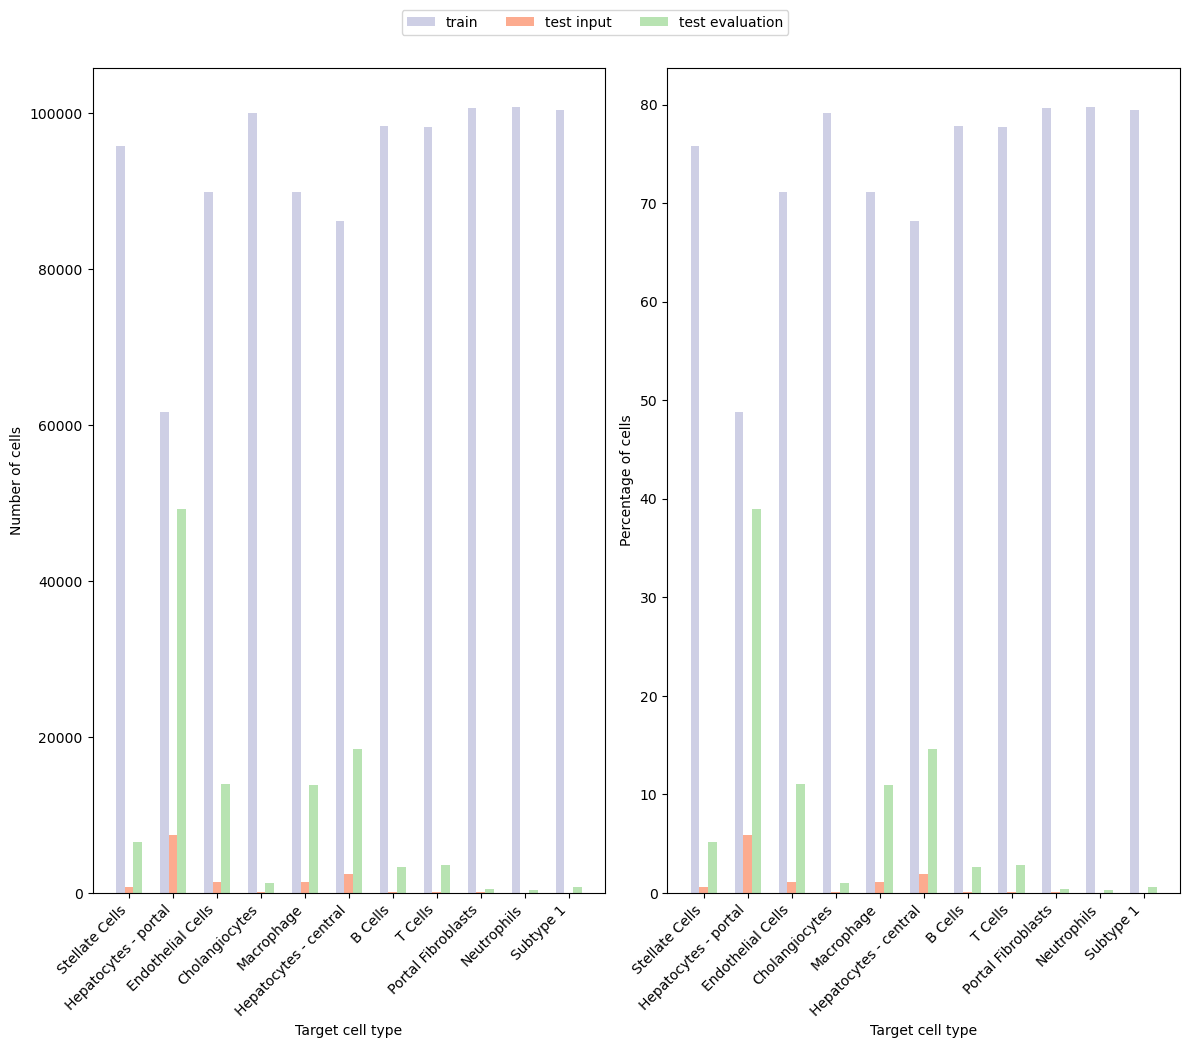

In [15]:
nault = NaultPipeline()
nault_multiple = NaultMultiplePipeline(
    dataset_pipeline=nault
)

subplot_counts(nault_multiple, filename='nault_bars_split_multiple')


Preprocessing started
Preprocessing finished
Stellate Cells: train=76842, ctrl test=826, stim test=6491
Hepatocytes - portal: train=42656, ctrl test=7492, stim test=49225
Endothelial Cells: train=70831, ctrl test=1445, stim test=14006
Cholangiocytes: train=80968, ctrl test=101, stim test=1333
Hepatocytes - central: train=67218, ctrl test=2486, stim test=18521
Portal Fibroblasts: train=81589, ctrl test=84, stim test=556
Stellate Cells: train=76842, ctrl test=826, stim test=6491
Stellate Cells with percentage: train=74.91956398806622, ctrl test=0.8053351013006259, stim test=6.328607920753466
Hepatocytes - portal: train=42656, ctrl test=7492, stim test=49225
Hepatocytes - portal with percentage: train=41.58883060663378, ctrl test=7.304564865549986, stim test=47.99348712048827
Endothelial Cells: train=70831, ctrl test=1445, stim test=14006
Endothelial Cells with percentage: train=69.05894740947292, ctrl test=1.4088489362946786, stim test=13.655597371448627
Cholangiocytes: train=80968, ctrl

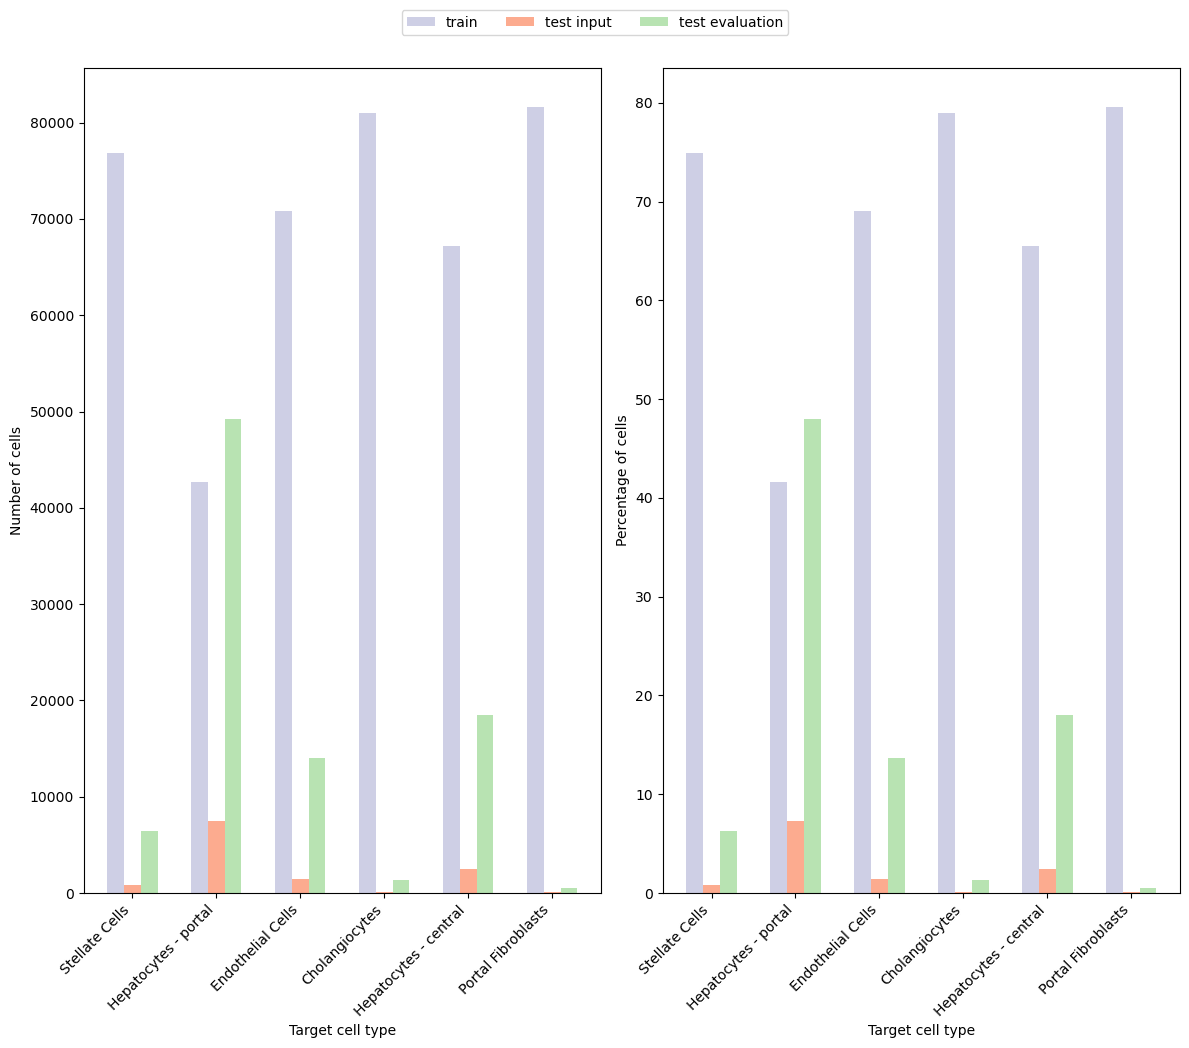

In [16]:
from thesis.datasets import NaultLiverTissuePipeline

nault = NaultLiverTissuePipeline()
nault_multiple = NaultMultiplePipeline(
    dataset_pipeline=nault
)

subplot_counts(nault_multiple, filename='nault_liver_bars_split_multiple')

Preprocessing started
Preprocessing finished


/g/kreshuk/katzalis/repos/thesis/thesis/datasets.py:463: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control.obs["condition"] = "control"
/g/kreshuk/katzalis/repos/thesis/thesis/datasets.py:464: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  perturb.obs["condition"] = "stimulated"


Stellate Cells: train=23008, ctrl test=826, stim test=389
Hepatocytes - portal: train=22478, ctrl test=7492, stim test=1052
Endothelial Cells: train=21051, ctrl test=1445, stim test=2836
Cholangiocytes: train=22842, ctrl test=101, stim test=597
Macrophage: train=18948, ctrl test=1411, stim test=5464
Hepatocytes - central: train=22259, ctrl test=2486, stim test=1325
B Cells: train=22195, ctrl test=120, stim test=1406
T Cells: train=22228, ctrl test=178, stim test=1364
Portal Fibroblasts: train=23261, ctrl test=84, stim test=73
Neutrophils: train=23211, ctrl test=42, stim test=135
Subtype 1: train=23100, ctrl test=60, stim test=274
Stellate Cells: train=23008, ctrl test=826, stim test=389
Stellate Cells with percentage: train=78.90260631001371, ctrl test=2.832647462277092, stim test=1.3340192043895747
Hepatocytes - portal: train=22478, ctrl test=7492, stim test=1052
Hepatocytes - portal with percentage: train=77.08504801097394, ctrl test=25.69272976680384, stim test=3.6076817558299044
En

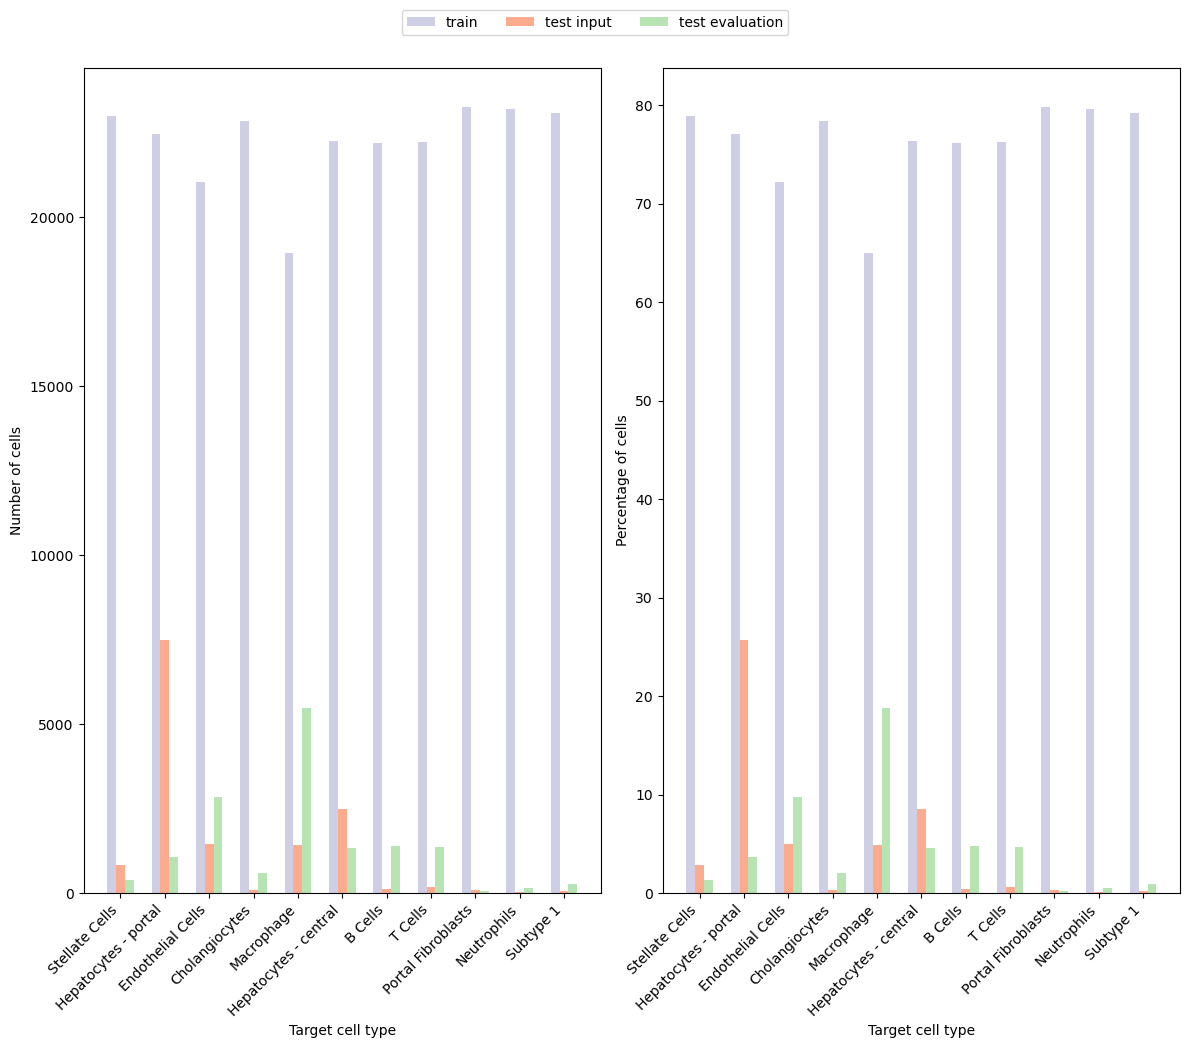

In [17]:
nault = NaultPipeline()

nault_single = NaultSinglePipeline(
    dataset_pipeline=nault, dosages=30
)

subplot_counts(nault_single, filename='nault_bars_split_30')

Preprocessing started
Preprocessing finished


/g/kreshuk/katzalis/repos/thesis/thesis/datasets.py:463: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control.obs["condition"] = "control"
/g/kreshuk/katzalis/repos/thesis/thesis/datasets.py:464: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  perturb.obs["condition"] = "stimulated"


Stellate Cells: train=14648, ctrl test=826, stim test=389
Hepatocytes - portal: train=14118, ctrl test=7492, stim test=1052
Endothelial Cells: train=12691, ctrl test=1445, stim test=2836
Cholangiocytes: train=14482, ctrl test=101, stim test=597
Hepatocytes - central: train=13899, ctrl test=2486, stim test=1325
Portal Fibroblasts: train=14901, ctrl test=84, stim test=73
Stellate Cells: train=14648, ctrl test=826, stim test=389
Stellate Cells with percentage: train=78.30642574575003, ctrl test=4.4156954987704475, stim test=2.0795466695178018
Hepatocytes - portal: train=14118, ctrl test=7492, stim test=1052
Hepatocytes - portal with percentage: train=75.47311023201112, ctrl test=40.05132043194697, stim test=5.623864000855341
Endothelial Cells: train=12691, ctrl test=1445, stim test=2836
Endothelial Cells with percentage: train=67.8445418582273, ctrl test=7.724794183684379, stim test=15.160910937667058
Cholangiocytes: train=14482, ctrl test=101, stim test=597
Cholangiocytes with percentage

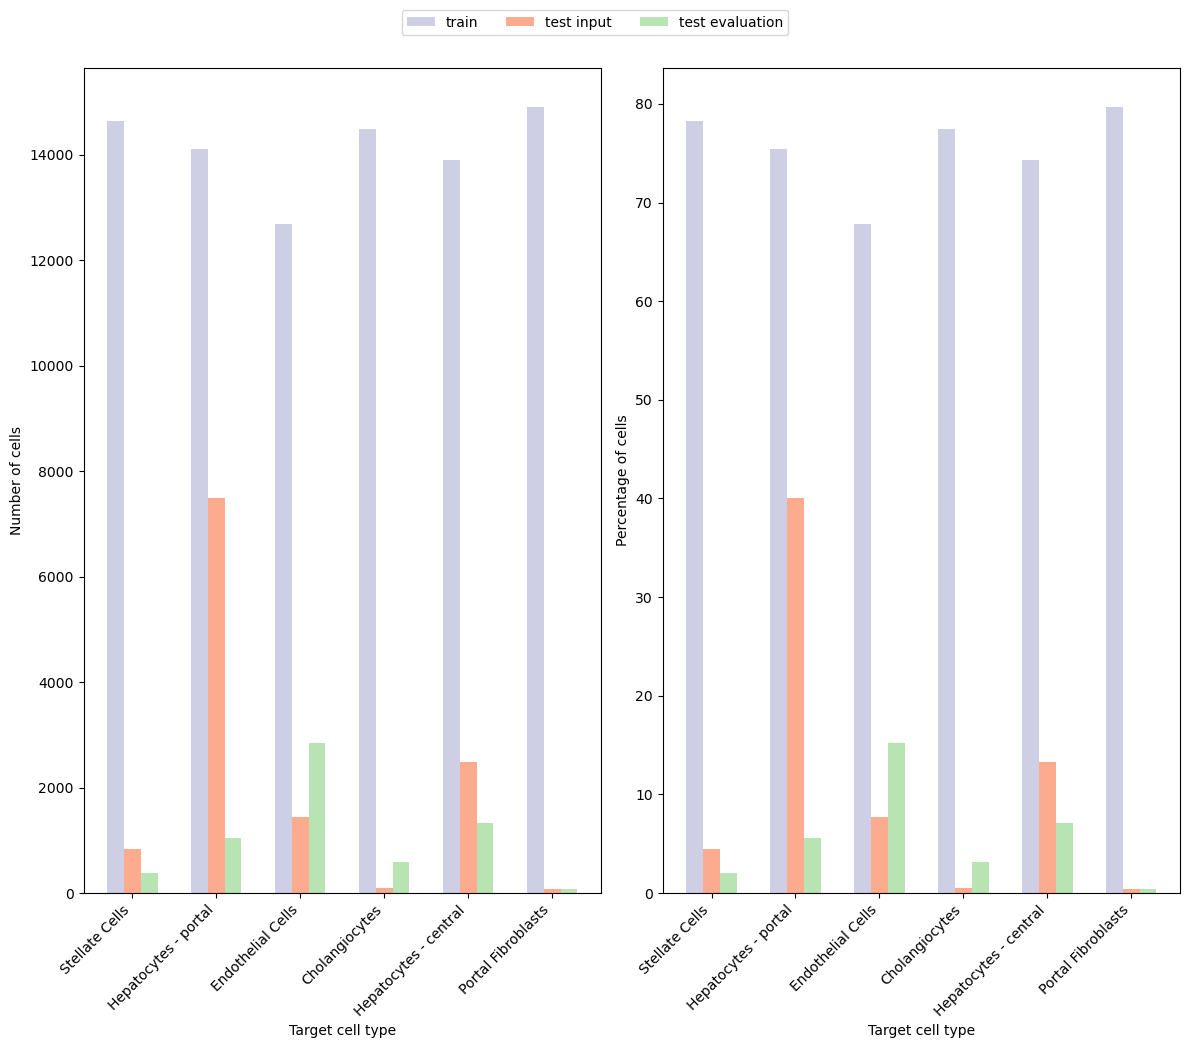

In [18]:
from thesis.datasets import NaultLiverTissuePipeline

nault = NaultLiverTissuePipeline()

nault_single = NaultSinglePipeline(
    dataset_pipeline=nault, dosages=30
)



subplot_counts(nault_single, filename='nault_liver_bars_split_30')

/g/kreshuk/katzalis/repos/thesis/thesis/datasets.py:590: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control.obs[dose_key] = 0.0
/g/kreshuk/katzalis/repos/thesis/thesis/datasets.py:591: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  perturb.obs[dose_key] = -1.0


CD4T: train=12304, ctrl test=2715, stim test=3483
Dendritic: train=14673, ctrl test=670, stim test=522
CD14+Mono: train=14532, ctrl test=2184, stim test=698
CD8T: train=14615, ctrl test=643, stim test=594
FCGR3A+Mono: train=12858, ctrl test=1232, stim test=2790
NK: train=14504, ctrl test=571, stim test=733
B: train=14206, ctrl test=928, stim test=1105
CD4T: train=12304, ctrl test=2715, stim test=3483
CD4T with percentage: train=65.21093915624337, ctrl test=14.38944244223023, stim test=18.459826160695357
Dendritic: train=14673, ctrl test=670, stim test=522
Dendritic with percentage: train=77.76658893364427, ctrl test=3.550985796056816, stim test=2.7665889336442655
CD14+Mono: train=14532, ctrl test=2184, stim test=698
CD14+Mono with percentage: train=77.01929192283231, ctrl test=11.575153699385202, stim test=3.69938520245919
CD8T: train=14615, ctrl test=643, stim test=594
CD8T with percentage: train=77.45919016323934, ctrl test=3.407886368454526, stim test=3.1481874072503713
FCGR3A+Mono:

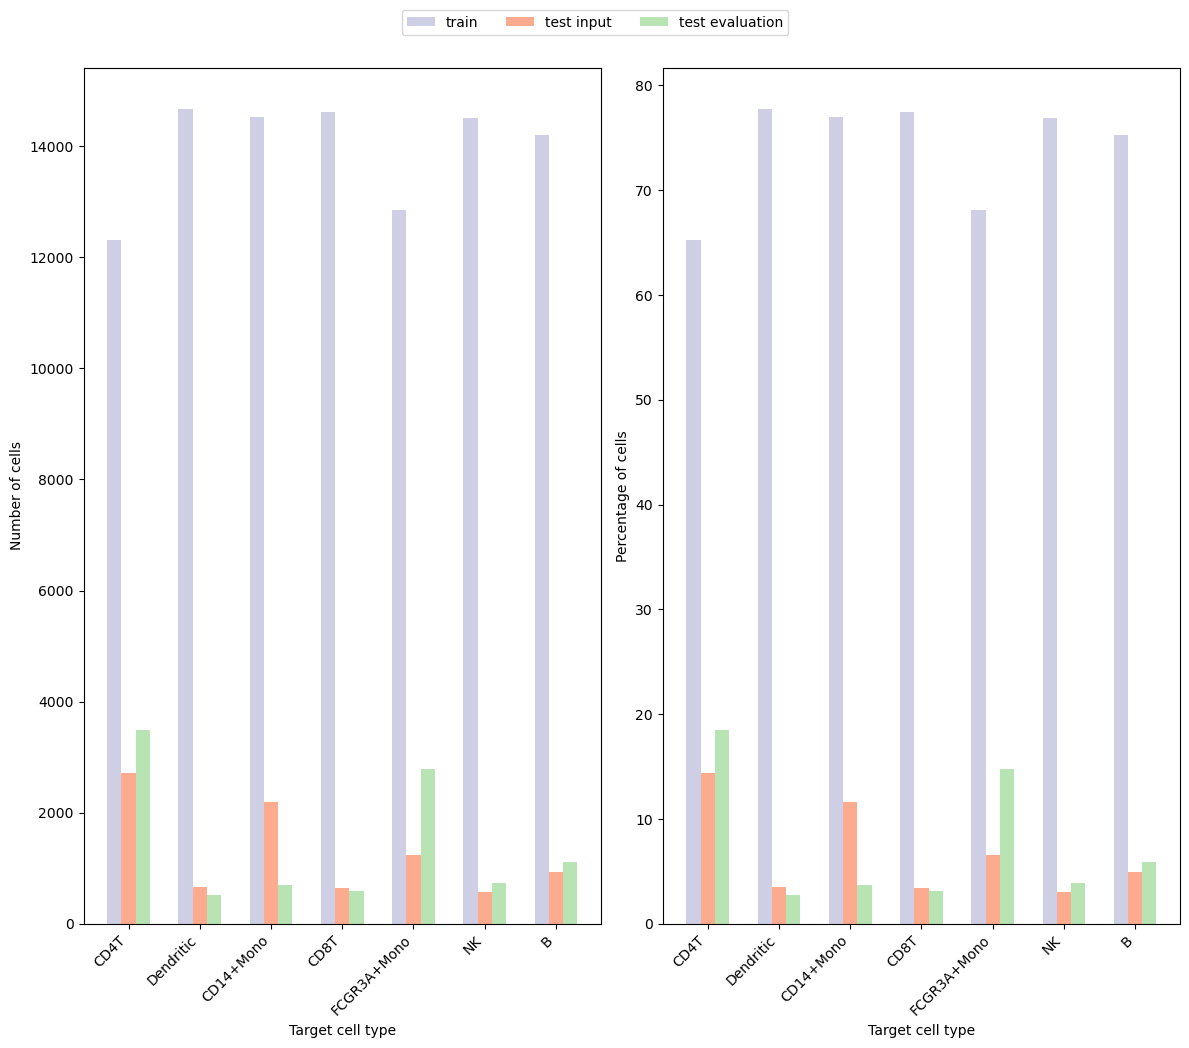

In [19]:
from thesis.datasets import PbmcPipeline, PbmcSinglePipeline

pbmc = PbmcPipeline()

pbmc_single = PbmcSinglePipeline(
    dataset_pipeline=pbmc
)

subplot_counts(pbmc_single, filename='pbmc_bars_split')
